# Scrapping & pembentukkan DataFrame

In [13]:
import pandas as pd
import requests
from bs4 import BeautifulSoup 
import matplotlib.pyplot as plt

In [14]:
# MASUK KE FLASK

url_get = requests.get('https://www.imdb.com/search/title/?release_date=2019-01-01,2019-12-31')
soup = BeautifulSoup(url_get.content,"html.parser")
print(soup.prettify()[:1045])

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="app-id=342792525, app-argument=imdb:///?src=mdot" name="apple-itunes-app"/>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   Released between 2019-01-01 and 2019-12-31
(Sorted by Popularity Ascending) - IMDb
  </title>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   if (typeof uex == 'functi

percobaan subset 1 movie

In [15]:
lister = soup.find_all('div', attrs={'class':'lister-item-content'})
print(type(lister))
print(len(lister))

<class 'bs4.element.ResultSet'>
50


In [46]:
urutan = lister[1].h3.span.text
#.replace('\.','',regex=True)
urutan

'2.'

In [16]:
judul = lister[1].h3.a.text
judul

'The Mandalorian'

In [17]:
rating = float(lister[1].strong.text)
rating

8.7

In [18]:
metascore = lister[1].find('div', attrs={'class':'ratings-metascore'})
type(metascore)

NoneType

In [19]:
votes = int(lister[1].find('span', attrs={'name':'nv'})['data-value'])
votes

167043

code yang mau masuk ke flask

In [20]:
lister = soup.find_all('div', attrs={'class':'lister-item-content'})
print(type(lister))
print(len(lister))

<class 'bs4.element.ResultSet'>
50


In [38]:
# MASUK KE FLASK

lister = soup.find_all('div', attrs={'class':'lister-item-content'})
print(type(lister))
print(len(lister))

# buat cangkang
titles = []
imdb_ratings = []
metascores = []
votes = []

# ambil data per movie
for onelist in lister:
    
# berpatok ke metascore
# kalau metascore ga none berarti isi masing2 kolom seperti apa?
    if onelist.find('div', class_ = 'inline-block ratings-metascore') is not None:
        
        # judul
        title = onelist.h3.a.text
        titles.append(title)
        
        # imdb rating
        ratings = float(onelist.strong.text)
        imdb_ratings.append(ratings)
        
        # metascore
        mscore = onelist.find('div', attrs={'class':'inline-block ratings-metascore'}).span.text
        mscore = int(mscore)/10
        metascores.append(float(mscore))
        
        # votes
        vote = onelist.find('span', attrs={'name':'nv'})['data-value']
        votes.append(int(vote))

# kalau metascore none berarti isi masing2 kolom seperti apa?
    if onelist.find('div', class_ = 'inline-block ratings-metascore') is None:
        
        # judul
        title = onelist.h3.a.text
        titles.append(title)
        
        # imdb rating
        ratings = float(onelist.strong.text)
        imdb_ratings.append(ratings)
        
        # metascore
        mscore = 0.0
        metascores.append(float(mscore))
        
        # votes
        vote = onelist.find('span', attrs={'name':'nv'})['data-value']
        votes.append(int(vote))
        
# dari cangkang yang dah dibuat disusun jadi df
df = pd.DataFrame({
'film_title': titles,
'imdb': imdb_ratings,
'metascore': metascores,
'votes': votes
})

print(df.info()) #cek data type
print()
print(df[df['metascore']==0].count())
print()
df

<class 'bs4.element.ResultSet'>
50
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   film_title  50 non-null     object 
 1   imdb        50 non-null     float64
 2   metascore   50 non-null     float64
 3   votes       50 non-null     int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 1.7+ KB
None

film_title    17
imdb          17
metascore     17
votes         17
dtype: int64



,film_title,imdb,metascore,votes
0,Star Wars: Episode IX - The Rise of Skywalker,6.7,5.3,319269
1,The Mandalorian,8.7,0.0,167043
2,After Life,8.5,0.0,67051
3,Dead to Me,8.1,0.0,37141
4,Once Upon a Time... in Hollywood,7.7,8.3,462383
5,The Gentlemen,7.9,5.1,130227
6,Gisaengchung,8.6,9.6,401952
7,Bad Education,7.2,7.9,12176
8,The Lodge,6.1,6.4,12012
9,El hoyo,7.0,7.3,117721


In [39]:
df1 = df.sort_values(['imdb','votes'], ascending=False).\
set_index('film_title')
# .head(7)
df1

,imdb,metascore,votes
film_title,,,
Chernobyl,9.4,0.0,460160
The Mandalorian,8.7,0.0,167043
The Boys,8.7,0.0,143685
Gisaengchung,8.6,9.6,401952
Joker,8.5,5.9,783953
After Life,8.5,0.0,67051
Avengers: Endgame,8.4,7.8,714665
The Morning Show,8.4,0.0,33766
What We Do in the Shadows,8.4,0.0,22338


In [32]:
# MASUK KE FLASK
# Buatlah plot dari 7 film paling populer di tahun 2019.

df = df[(df['imdb']>7)&(df['metascore']>7)].sort_values(['imdb','metascore'], ascending=False).\
set_index('film_title').head(7)
df

,imdb,metascore,votes
film_title,,,
Gisaengchung,8.6,9.6,401952
Avengers: Endgame,8.4,7.8,714665
1917,8.3,7.8,305590
Portrait de la jeune fille en feu,8.2,9.5,36675
Ford v Ferrari,8.1,8.1,212899
The Irishman,7.9,9.4,287653
Little Women,7.9,9.1,102334


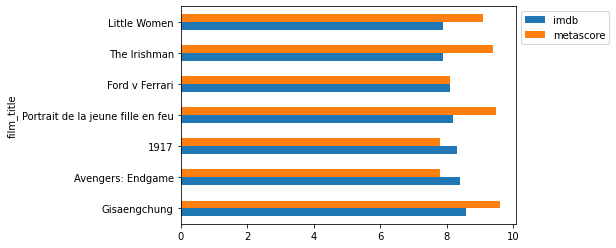

In [33]:
# MASUK KE FLASK

df.drop(columns='votes').plot(kind='barh', width=0.5, align='center').legend(bbox_to_anchor=(1,1), loc=2)

In [24]:
# CEK METASCORE YANG NONE

titles = []
imdb_ratings = []
metascores = []
votes = []

# ambil data per movie
for onelist in lister:

    if onelist.find('div', class_ = 'inline-block ratings-metascore') is None:
        
        # judul
        title = onelist.h3.a.text
        titles.append(title)
        
        # imdb rating
        ratings = float(onelist.strong.text)
        imdb_ratings.append(ratings)
        
        # metascore
        mscore = 0
        metascores.append(int(mscore))
        
        # votes
        vote = onelist.find('span', attrs={'name':'nv'})['data-value']
        votes.append(int(vote))
        
df = pd.DataFrame({
'film_title': titles,
'imdb': imdb_ratings,
'metascore': metascores,
'votes': votes
})
print(df.info()) #cek data type
print()
print(df[df['metascore']==0].count()) #buat cek jumlah film dgn metascore kosong berapa banyak
print()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   film_title  17 non-null     object 
 1   imdb        17 non-null     float64
 2   metascore   17 non-null     int64  
 3   votes       17 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 672.0+ bytes
None

film_title    17
imdb          17
metascore     17
votes         17
dtype: int64



,film_title,imdb,metascore,votes
0,The Mandalorian,8.7,0,167043
1,After Life,8.5,0,67051
2,Dead to Me,8.1,0,37141
3,Reckoning,6.6,0,537
4,What We Do in the Shadows,8.4,0,22338
5,The Witcher,8.3,0,252473
6,Chernobyl,9.4,0,460160
7,The Boys,8.7,0,143685
8,NOS4A2,6.7,0,5429
9,Sex Education,8.3,0,131667


---

# Draft app.py (Flask)

In [27]:
from flask import Flask, render_template 
import pandas as pd
import requests
from bs4 import BeautifulSoup 
from io import BytesIO
import base64
import matplotlib.pyplot as plt

app = Flask(__name__)

def scrap(url):
    #This is fuction for scrapping
    url_get = requests.get('https://www.imdb.com/search/title/?release_date=2019-01-01,2019-12-31')
    soup = BeautifulSoup(url_get.content,"html.parser")
    lister = soup.find_all('div', attrs={'class':'lister-item-content'})
    
    #Find the key to get the information
    # buat cangkang
    titles = []
    imdb_ratings = []
    metascores = []
    votes = []

    # ambil data per movie
    for onelist in lister:
    
        # berpatok ke metascore
        # kalau metascore ga none berarti isi masing2 kolom seperti apa?
        if onelist.find('div', class_ = 'inline-block ratings-metascore') is not None:
        
            # judul
            title = onelist.h3.a.text
            titles.append(title)
        
            # imdb rating
            ratings = float(onelist.strong.text)
            imdb_ratings.append(ratings)
        
            # metascore
            mscore = onelist.find('div', attrs={'class':'inline-block ratings-metascore'}).span.text
            mscore = int(mscore)/10
            metascores.append(float(mscore))
        
            # votes
            vote = onelist.find('span', attrs={'name':'nv'})['data-value']
            votes.append(int(vote))

        # kalau metascore none berarti isi masing2 kolom seperti apa?
        if onelist.find('div', class_ = 'inline-block ratings-metascore') is None:
        
            # judul
            title = onelist.h3.a.text
            titles.append(title)
        
            # imdb rating
            ratings = float(onelist.strong.text)
            imdb_ratings.append(ratings)
        
            # metascore
            mscore = 0.0
            metascores.append(float(mscore))
        
            # votes
            vote = onelist.find('span', attrs={'name':'nv'})['data-value']
            votes.append(int(vote))
        
    # dari cangkang yang dah dibuat disusun jadi df
    df = pd.DataFrame({
    'film_title': titles,
    'imdb': imdb_ratings,
    'metascore': metascores,
    'votes': votes
    })
    
    df = df[(df['imdb']>7)&(df['metascore']>7)].sort_values(['imdb','metascore'], ascending=False).\
    set_index('film_title').head(7)

    return df

@app.route("/")
def index():
    df = scrap('https://www.imdb.com/search/title/?release_date=2019-01-01,2019-12-31') #insert url here

    #This part for rendering matplotlib
    fig = plt.figure(figsize=(5,2),dpi=300)
    df.drop(columns='votes').plot(kind='barh', width=0.5, align='center').legend(bbox_to_anchor=(1,1), loc=2)
    
    #Do not change this part
    plt.savefig('plot1',bbox_inches="tight") 
    figfile = BytesIO()
    plt.savefig(figfile, format='png')
    figfile.seek(0)
    figdata_png = base64.b64encode(figfile.getvalue())
    result = str(figdata_png)[2:-1]
    #This part for rendering matplotlib

    #this is for rendering the table
    df = df.to_html(classes=["table table-bordered table-striped table-dark table-condensed"])

    return render_template("index_copy1.html", table=df, result=result)    
    
if __name__ == "__main__": 
    app.run(debug=True)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with stat


SystemExit: 1

C:\Users\Margareth Devina\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3334: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [34]:
df

,imdb,metascore,votes
film_title,,,
Gisaengchung,8.6,9.6,401952
Avengers: Endgame,8.4,7.8,714665
1917,8.3,7.8,305590
Portrait de la jeune fille en feu,8.2,9.5,36675
Ford v Ferrari,8.1,8.1,212899
The Irishman,7.9,9.4,287653
Little Women,7.9,9.1,102334


<Figure size 5x5 with 0 Axes>

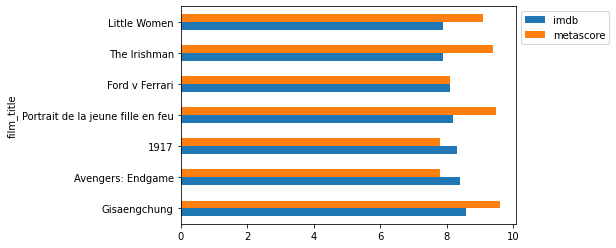

In [35]:
fig = plt.figure(figsize=(1,1), dpi=5)
df.drop(columns='votes').plot(kind='barh').legend(bbox_to_anchor=(1,1), loc=2)
    
plt.savefig('plot1',bbox_inches="tight")